In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

# Preprocesamiento de imágenes
train_dir = 'train'


# Función para eliminar ruido de las imágenes usando OpenCV
def remove_noise(img):
    return cv2.GaussianBlur(img, (5, 5), 0)  # Aplicamos un filtro gaussiano para suavizar

# Función personalizada para aplicar en ImageDataGenerator
def preprocessing_function(image):
    # Convertimos a formato array
    img_array = np.array(image)
    
    # Eliminar ruido
    img_array = remove_noise(img_array)
    
    # Devolver la imagen preprocesada como array
    return img_array

# Preprocesamiento de imágenes
train_datagen = ImageDataGenerator(
    rescale=1/255.0,           # Normalización de valores de píxeles entre 0 y 1
    rotation_range=40,         # Rotación de las imágenes
    width_shift_range=0.2,     # Desplazamiento horizontal
    height_shift_range=0.2,    # Desplazamiento vertical
    shear_range=0.2,           # Aplicación de deformaciones (shear)
    zoom_range=0.2,            # Aplicación de zoom en las imágenes
    horizontal_flip=True,      # Inversión horizontal de las imágenes
    fill_mode='nearest',       # Rellenar espacios creados por las transformaciones
    preprocessing_function=preprocessing_function  # Eliminar ruido mediante filtrado
)


# Cargar imágenes desde los directorios de entrenamiento y prueba
train_generator = train_datagen.flow_from_directory(
    'train',  # Directorio de entrenamiento
    target_size=(150, 150),  # Ajustar tamaño a 150x150
    batch_size=32,
    class_mode='binary'  # Clasificación binaria (Benign/Malignant)
)


Found 11879 images belonging to 2 classes.


In [23]:

# Definir el modelo denso
model = Sequential()
model.add(Flatten(input_shape=(150, 150, 3)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [24]:

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │     1,080,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,080,849 (4.12 MB)

 Trainable params: 1,080,849 (4.12 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=10,
    batch_size=32
)

Epoch 1/10


KeyboardInterrupt: 

In [ ]:
# 7. Recompilar el modelo con el optimizador 'adagrad'
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

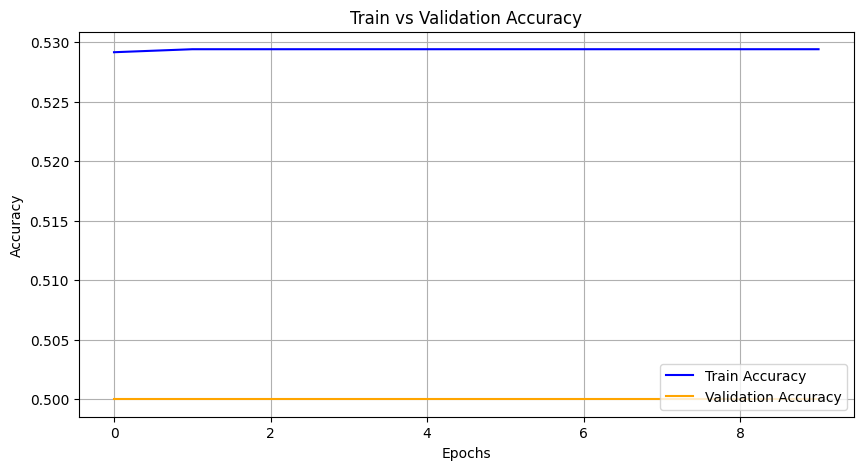

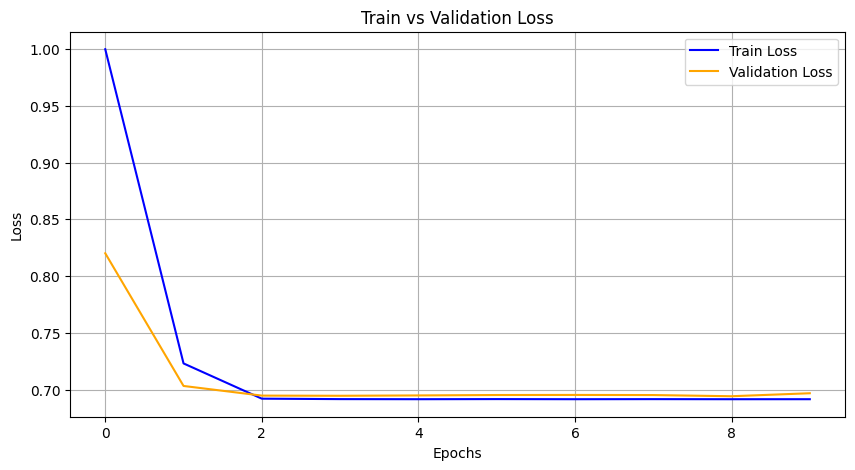

In [ ]:
# Obtener los datos del historial de entrenamiento
acc = history.history['accuracy']  # Precisión en entrenamiento
val_acc = history.history['val_accuracy']  # Precisión en validación

loss = history.history['loss']  # Pérdida en entrenamiento
val_loss = history.history['val_loss']  # Pérdida en validación

epochs_range = range(len(acc))

# Gráfica de Train Accuracy vs Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, acc, label='Train Accuracy', color='blue')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='orange')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Gráfica de Train Loss vs Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, loss, label='Train Loss', color='blue')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='orange')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()